# RMIT Rohan Poorun s3843078 - Machine Learning Assignment 1

### Load the datasets:

Here we load both the training and test datasets into the Jupyter Notebook using pandas:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

patients_test = pd.read_csv('Paitients_Files_Test.csv')
patients_test

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0
...,...,...,...,...,...,...,...,...,...,...
164,ICU200773,10,101,76,48,180,32.9,0.171,63,1
165,ICU200774,2,122,70,27,0,36.8,0.340,27,1
166,ICU200775,5,121,72,23,112,26.2,0.245,30,1
167,ICU200776,1,126,60,0,0,30.1,0.349,47,1


In [2]:
patients_train = pd.read_csv('Paitients_Files_Train.csv')
patients_train

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...
594,ICU200604,6,123,72,45,230,33.6,0.733,34,0,Negative
595,ICU200605,0,188,82,14,185,32.0,0.682,22,1,Positive
596,ICU200606,0,67,76,0,0,45.3,0.194,46,1,Negative
597,ICU200607,1,89,24,19,25,27.8,0.559,21,0,Negative


### Exploratory Data Analysis (EDA)

Whilst we loaded both datasets, EDA should only be conducted on the training dataset (the full dataset) and not the test dataset to avoid overfitting the model.

In [3]:
# Check the shape of the patients_train dataset
patients_train.shape

(599, 11)

As we can see above, the training dataset has 599 rows and 11 columns.

In [4]:
patients_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


Drop the ID and Insurance column as specified in the specification as they are unrelated to the prediction of whether a patient will develop Sepsis.

In [5]:
patients_train = patients_train.drop(columns=['ID', 'Insurance'])
patients_test =  patients_test.drop(columns=['ID', 'Insurance'])
patients_train

,PRG,PL,PR,SK,TS,M11,BD2,Age,Sepssis
0,6,148,72,35,0,33.6,0.627,50,Positive
1,1,85,66,29,0,26.6,0.351,31,Negative
2,8,183,64,0,0,23.3,0.672,32,Positive
3,1,89,66,23,94,28.1,0.167,21,Negative
4,0,137,40,35,168,43.1,2.288,33,Positive
...,...,...,...,...,...,...,...,...,...
594,6,123,72,45,230,33.6,0.733,34,Negative
595,0,188,82,14,185,32.0,0.682,22,Positive
596,0,67,76,0,0,45.3,0.194,46,Negative
597,1,89,24,19,25,27.8,0.559,21,Negative


Let's plot histograms for each of the attributes of the training dataset to determine each variables distribution.

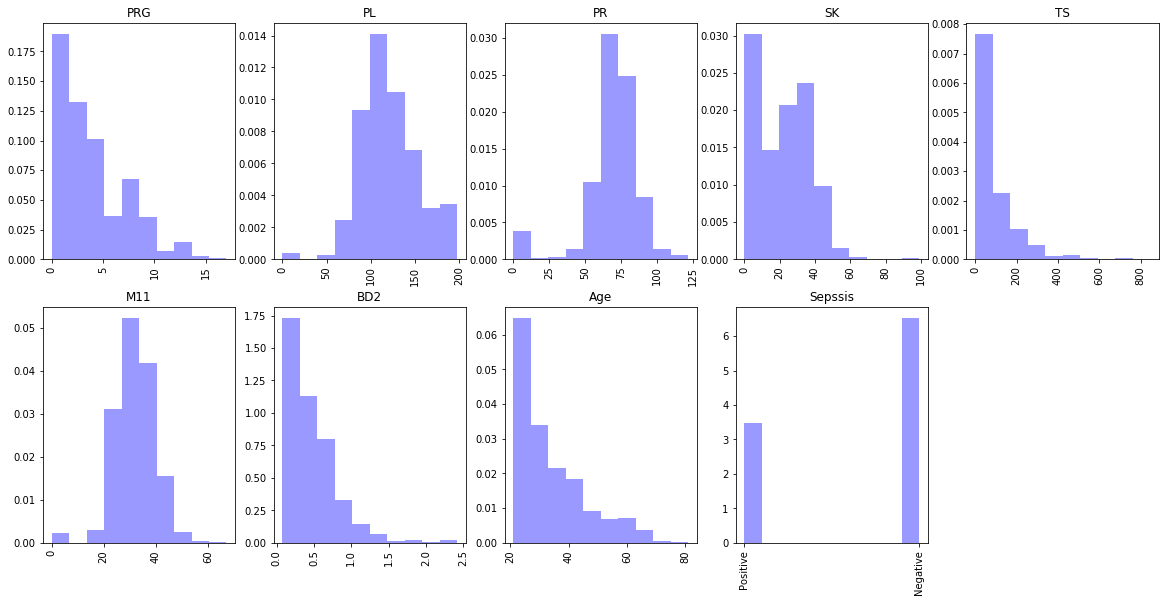

In [6]:
plt.figure(figsize=(20,20))
for i, col in enumerate(patients_train.columns):
    plt.subplot(4,5,i+1)
    plt.hist(patients_train[col], alpha=0.4, color='b', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')

Observations of the histograms: 
- Many variables are heavily skewed: PRG, SK, TS, BD2 and Age
- Some variables seem to have outliers which will need further investigation: SK and TS
- The target variable Sepssis is a categorical variable with most results being negative


In order to investigate the outliers further, let create a boxplot for each numerical variable.

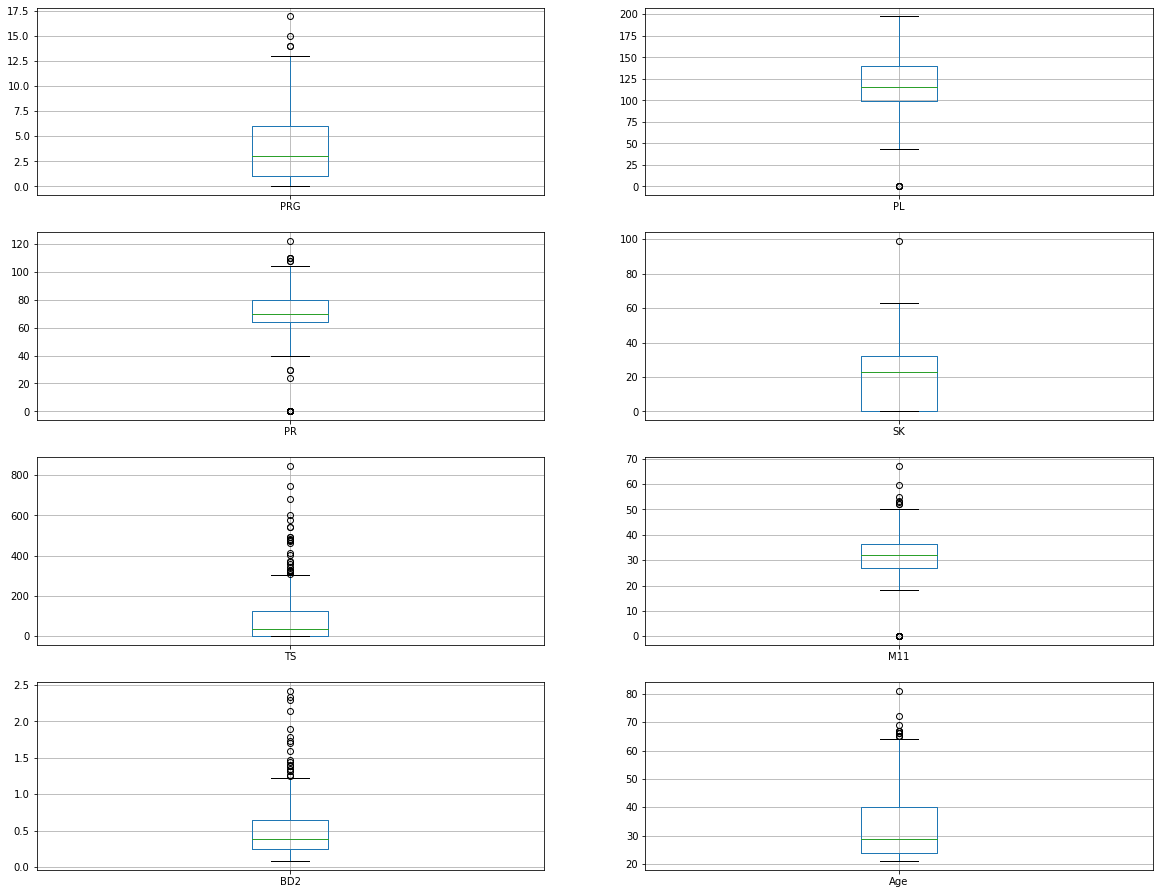

In [7]:
data = patients_train.copy()
data = data.drop(columns=['Sepssis'])
    
plt.figure(figsize=(20,20))
for i, col in enumerate(data.columns):
    plt.subplot(5,2,i+1)
    data.boxplot([col])

Observations:
- There are more outliers than initally thought.
- There are outlier in each attribute that will need to be dealt with.

In [8]:
data.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


As we can see in the above dataset, some information about the boxplots for each variable is missing: The `Upper Whisker` and the `Lower Whisker`. Let's add these to the `boxplot_data` Dataframe as it will be useful when dealing with the outliers and is also useful to understanding the data. Any value less than the Lower Whisker or higher than the upper whisker is considered an outlier.

In [9]:
boxplot_data = data.describe()

from matplotlib.cbook import boxplot_stats

prg_whishi = boxplot_stats(data['PRG'])[0].get("whishi")
prg_whislo = boxplot_stats(data['PRG'])[0].get("whislo")
prg_med = boxplot_stats(data['PRG'])[0].get("med")

pl_whishi = boxplot_stats(data['PL'])[0].get("whishi")
pl_whislo = boxplot_stats(data['PL'])[0].get("whislo")
pl_med = boxplot_stats(data['PL'])[0].get("med")

pr_whishi = boxplot_stats(data['PR'])[0].get("whishi")
pr_whislo = boxplot_stats(data['PR'])[0].get("whislo")
pr_med = boxplot_stats(data['PR'])[0].get("med")

sk_whishi = boxplot_stats(data['SK'])[0].get("whishi")
sk_whislo = boxplot_stats(data['SK'])[0].get("whislo")
sk_med = boxplot_stats(data['SK'])[0].get("med")

ts_whishi = boxplot_stats(data['TS'])[0].get("whishi")
ts_whislo = boxplot_stats(data['TS'])[0].get("whislo")
ts_med = boxplot_stats(data['TS'])[0].get("med")

m11_whishi = boxplot_stats(data['M11'])[0].get("whishi")
m11_whislo = boxplot_stats(data['M11'])[0].get("whislo")
m11_med = boxplot_stats(data['M11'])[0].get("med")

bd2_whishi = boxplot_stats(data['BD2'])[0].get("whishi")
bd2_whislo = boxplot_stats(data['BD2'])[0].get("whislo")
bd2_med = boxplot_stats(data['BD2'])[0].get("med")

age_whishi = boxplot_stats(data['Age'])[0].get("whishi")
age_whislo = boxplot_stats(data['Age'])[0].get("whislo")
age_med = boxplot_stats(data['Age'])[0].get("med")

boxplot_data.loc['whishi'] = [prg_whishi, pl_whishi, pr_whishi, sk_whishi, ts_whishi, 
                              m11_whishi, bd2_whishi, age_whishi]
boxplot_data.loc['whislo'] = [prg_whislo, pl_whislo, pr_whislo, sk_whislo, ts_whislo, 
                              m11_whislo, bd2_whislo, age_whislo]
boxplot_data.loc['med'] = [prg_med, pl_med, pr_med, sk_med, ts_med, m11_med, bd2_med, age_med]

boxplot_data

,PRG,PL,PR,SK,TS,M11,BD2,Age
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000
whishi,13.000000,198.000000,104.000000,63.000000,304.000000,50.000000,1.224000,64.000000
whislo,0.000000,44.000000,40.000000,0.000000,0.000000,18.200000,0.078000,21.000000


In the above figures, we have explored the individual variables to gain a better understanding of their distribution and the individual values that make up these variables to allow us to plan the data cleaning phase. Now, let's explore the relationship between two variables, in particular the dependent variable, `Sepssis` and the independent variables: `PRG`, `PL`, `PR`, `SK`, `TS`, `M11`, `BD2` and `Age`. Thus, since `Sepssis` is a binary variable (meaning it can only be two values: Postive and Negative) it is therefore a Categorical Variable. All the other independent variables are numerical variables. Therefore we can use side by side box-plots to properly analyse the relationship between a categorical and numerical variable.

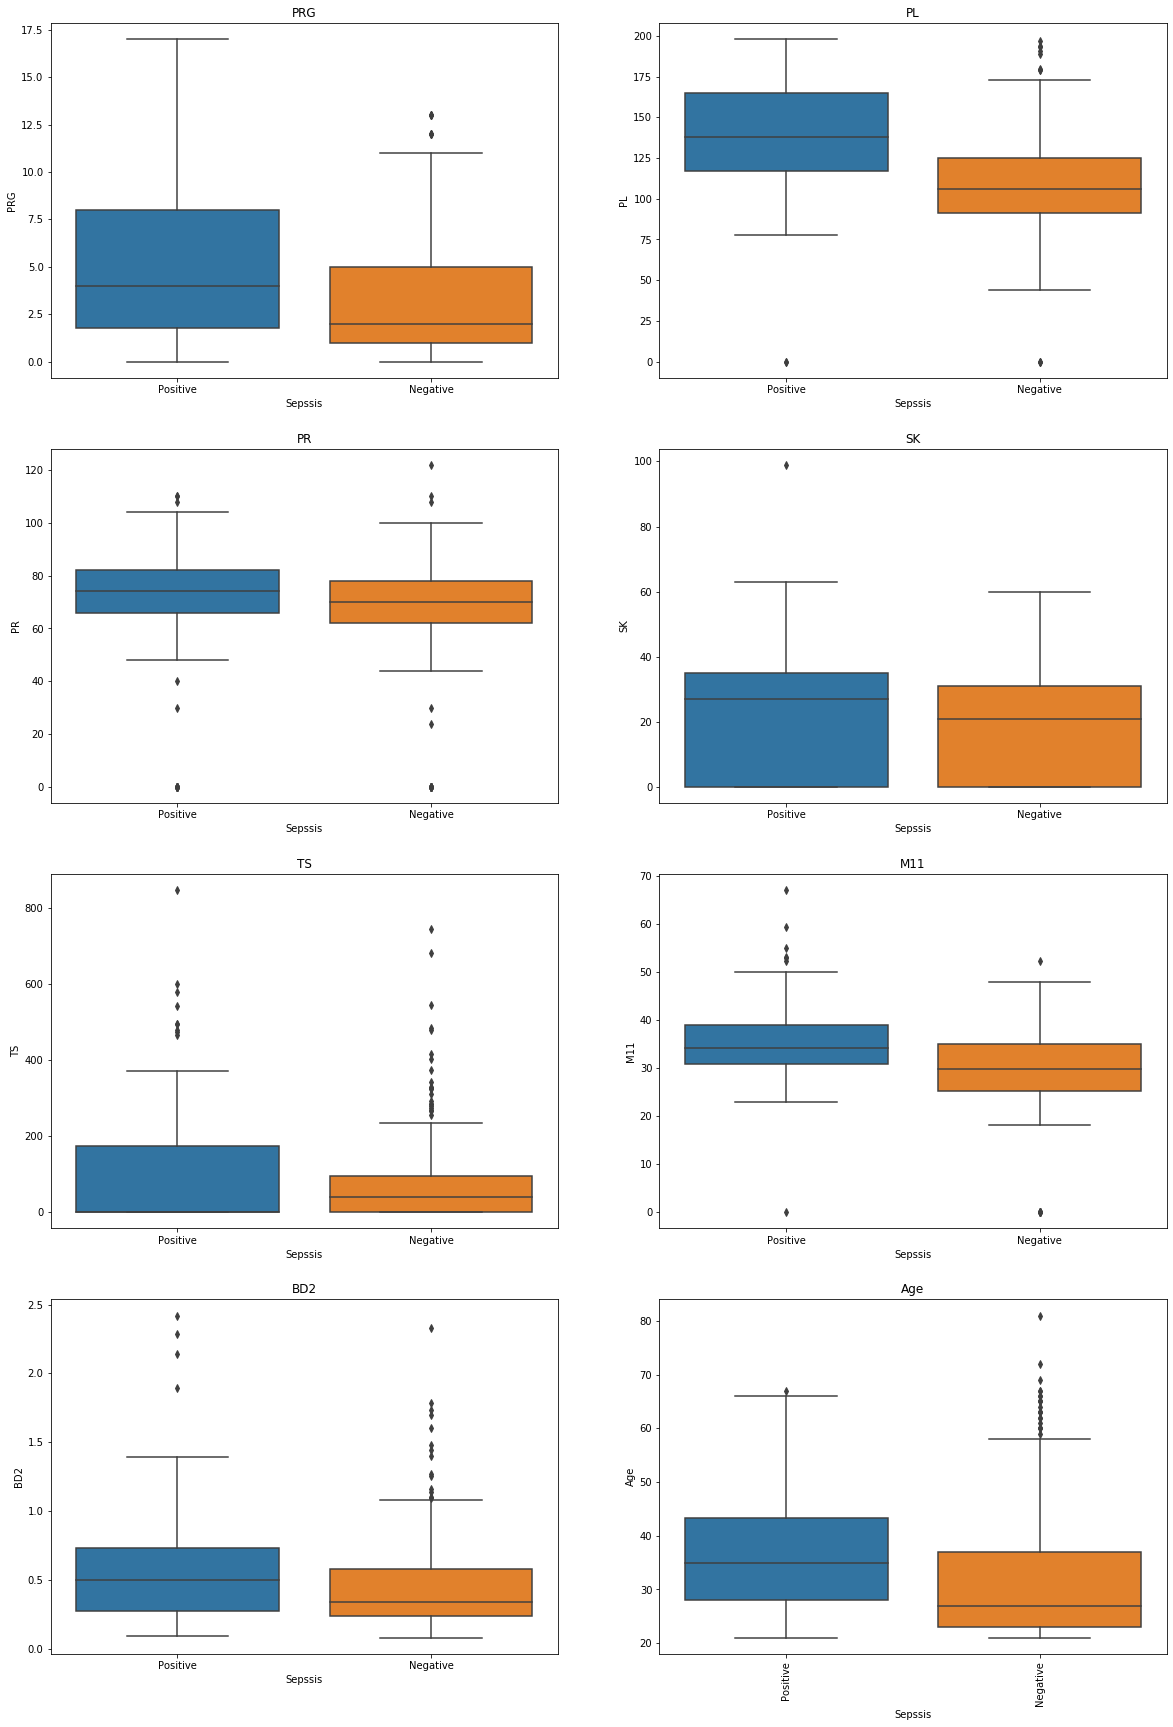

In [10]:
import seaborn as sns
plt.figure(figsize=(20,30))
for i, col in enumerate(data.columns):
    plt.subplot(4,2,i+1)
    sns.boxplot(y=col, x='Sepssis', data=patients_train)
    # sns.regplot(x=col,y='MEDV', data=bostonHouseFrame)
    plt.title(col)


plt.xticks(rotation='vertical')
plt.show()

The most important feature of these boxplots is it shows how the median value varies between each independent variable when differentiated by the dependent variable. For example: The median BD2 is higher for patients is higher when Positive compared to the median when negative.

### Data Preparation

For this assignment we were told that the dataset was complete with no missing data despite the dataset containing many '0' values that may be interpreted as missing values. However in this experiment we will follow the specifications and assume that the dataset is complete. This is also supported by Output [5] in the EDA section.

However, as we discovered in the Exploratory Data Analysis (EDA) phase, there are outliers in the data. Let's first learn more about **how many outliers** are in each column of the dataset and then choose a method to handle these outliers.

In [11]:
boxplot_data

,PRG,PL,PR,SK,TS,M11,BD2,Age
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000
whishi,13.000000,198.000000,104.000000,63.000000,304.000000,50.000000,1.224000,64.000000
whislo,0.000000,44.000000,40.000000,0.000000,0.000000,18.200000,0.078000,21.000000


Outliers in PRG column:

In [12]:
patients_train[(patients_train['PRG'] > boxplot_data.loc['whishi', 'PRG']) |
               (patients_train['PRG'] < boxplot_data.loc['whislo', 'PRG'])]

,PRG,PL,PR,SK,TS,M11,BD2,Age,Sepssis
88,15,136,70,32,110,37.1,0.153,43,Positive
159,17,163,72,41,114,40.9,0.817,47,Positive
298,14,100,78,25,184,36.6,0.412,46,Positive
455,14,175,62,30,0,33.6,0.212,38,Positive


Outliers in PL column:

In [13]:
patients_train[(patients_train['PL'] > boxplot_data.loc['whishi', 'PL']) |
               (patients_train['PL'] < boxplot_data.loc['whislo', 'PL'])]

,PRG,PL,PR,SK,TS,M11,BD2,Age,Sepssis
75,1,0,48,20,0,24.7,0.140,22,Negative
182,1,0,74,20,23,27.7,0.299,21,Negative
342,1,0,68,35,0,32.0,0.389,22,Negative
349,5,0,80,32,0,41.0,0.346,37,Positive
502,6,0,68,41,0,39.0,0.727,41,Positive


Outliers in PR column:

In [14]:
patients_train[(patients_train['PR'] > boxplot_data.loc['whishi', 'PR']) |
               (patients_train['PR'] < boxplot_data.loc['whislo', 'PR'])]

,PRG,PL,PR,SK,TS,M11,BD2,Age,Sepssis
7,10,115,0,0,0,35.3,0.134,29,Negative
15,7,100,0,0,0,30.0,0.484,32,Positive
18,1,103,30,38,83,43.3,0.183,33,Negative
43,9,171,110,24,240,45.4,0.721,54,Positive
49,7,105,0,0,0,0.0,0.305,24,Negative
60,2,84,0,0,0,0.0,0.304,21,Negative
78,0,131,0,0,0,43.2,0.270,26,Positive
81,2,74,0,0,0,0.0,0.102,22,Negative
84,5,137,108,0,0,48.8,0.227,37,Positive
106,1,96,122,0,0,22.4,0.207,27,Negative


As we can see clearly there are many outliers from just these 3 variables. Deleting these variables will remove too many datapoints, therefore let's choose to fix these outliers by replacing them with the median of each variable. The median is chosen over the mean due to the mean being heavily influenced by outliers, thus the median is a better choice.

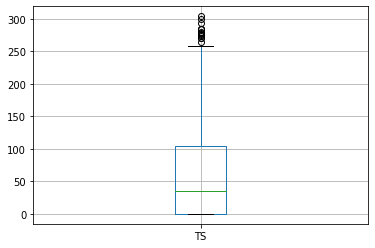

In [15]:
patients_train_clean = patients_train.copy()

patients_train_clean['TS'] = np.where((patients_train_clean['TS'] > boxplot_data.loc['whishi', 'TS']) |
                                       (patients_train_clean['TS'] < boxplot_data.loc['whislo', 'TS']),
                                       boxplot_data.loc['med', 'TS'], patients_train_clean['TS'])

patients_train_clean.boxplot(column=['TS'])

In the above boxplot we can see there are still outliers present. Thus we need to use a different method to deal with the outliers. Let's now try outlier capping using the IQR method. Simply, this means that any value greater than the upper whisker is replaced by the value of the upper whisker and any value less than the lower whisker is replaced with the value of the lower whisker. 

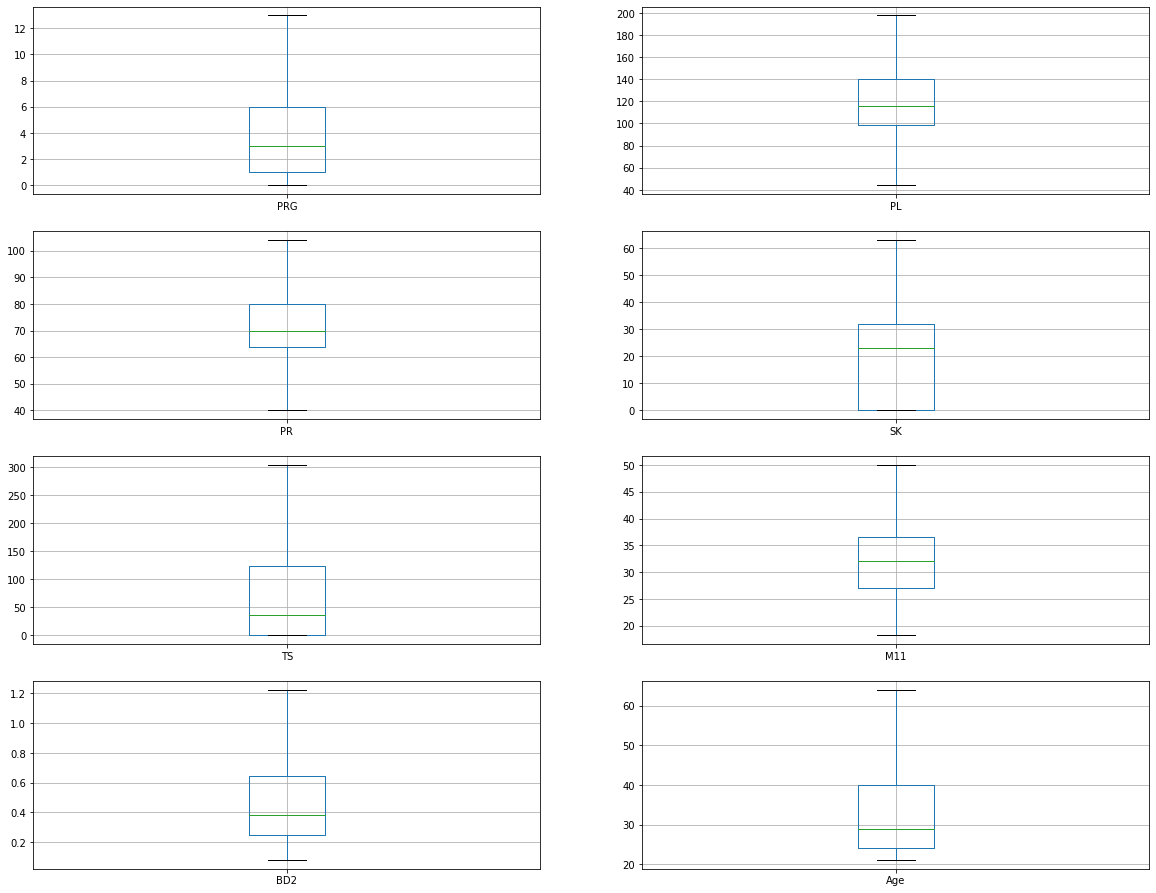

In [16]:
patients_train_clean = patients_train.copy()

patients_train_clean['PRG'] = np.where(patients_train_clean['PRG'] > boxplot_data.loc['whishi', 'PRG'], 
                                      boxplot_data.loc['whishi', 'PRG'], np.where(patients_train_clean['PRG'] 
                                      < boxplot_data.loc['whislo', 'PRG'], boxplot_data.loc['whislo', 'PRG'], 
                                        patients_train_clean['PRG']))

patients_train_clean['PL'] = np.where(patients_train_clean['PL'] > boxplot_data.loc['whishi', 'PL'], 
                                      boxplot_data.loc['whishi', 'PL'], np.where(patients_train_clean['PL'] 
                                      < boxplot_data.loc['whislo', 'PL'], boxplot_data.loc['whislo', 'PL'], 
                                        patients_train_clean['PL']))

patients_train_clean['PR'] = np.where(patients_train_clean['PR'] > boxplot_data.loc['whishi', 'PR'], 
                                      boxplot_data.loc['whishi', 'PR'], np.where(patients_train_clean['PR'] 
                                      < boxplot_data.loc['whislo', 'PR'], boxplot_data.loc['whislo', 'PR'], 
                                        patients_train_clean['PR']))

patients_train_clean['SK'] = np.where(patients_train_clean['SK'] > boxplot_data.loc['whishi', 'SK'], 
                                      boxplot_data.loc['whishi', 'SK'], np.where(patients_train_clean['SK'] 
                                      < boxplot_data.loc['whislo', 'SK'], boxplot_data.loc['whislo', 'SK'], 
                                        patients_train_clean['SK']))

patients_train_clean['TS'] = np.where(patients_train_clean['TS'] > boxplot_data.loc['whishi', 'TS'], 
                                      boxplot_data.loc['whishi', 'TS'], np.where(patients_train_clean['TS'] 
                                      < boxplot_data.loc['whislo', 'TS'], boxplot_data.loc['whislo', 'TS'], 
                                        patients_train_clean['TS']))

patients_train_clean['M11'] = np.where(patients_train_clean['M11'] > boxplot_data.loc['whishi', 'M11'], 
                                      boxplot_data.loc['whishi', 'M11'], np.where(patients_train_clean['M11'] 
                                      < boxplot_data.loc['whislo', 'M11'], boxplot_data.loc['whislo', 'M11'], 
                                        patients_train_clean['M11']))

patients_train_clean['BD2'] = np.where(patients_train_clean['BD2'] > boxplot_data.loc['whishi', 'BD2'], 
                                      boxplot_data.loc['whishi', 'BD2'], np.where(patients_train_clean['BD2'] 
                                      < boxplot_data.loc['whislo', 'BD2'], boxplot_data.loc['whislo', 'BD2'], 
                                        patients_train_clean['BD2']))

patients_train_clean['Age'] = np.where(patients_train_clean['Age'] > boxplot_data.loc['whishi', 'Age'], 
                                      boxplot_data.loc['whishi', 'Age'], np.where(patients_train_clean['Age'] 
                                      < boxplot_data.loc['whislo', 'Age'], boxplot_data.loc['whislo', 'Age'], 
                                        patients_train_clean['Age']))

data_clean = patients_train_clean.copy()
data_clean = data_clean.drop(columns=['Sepssis'])

plt.figure(figsize=(20,20))
for i, col in enumerate(data_clean.columns):
    plt.subplot(5,2,i+1)
    data_clean.boxplot([col])

After observing all the boxplots for the different variables, we can now determine that the dataset has no outliers.

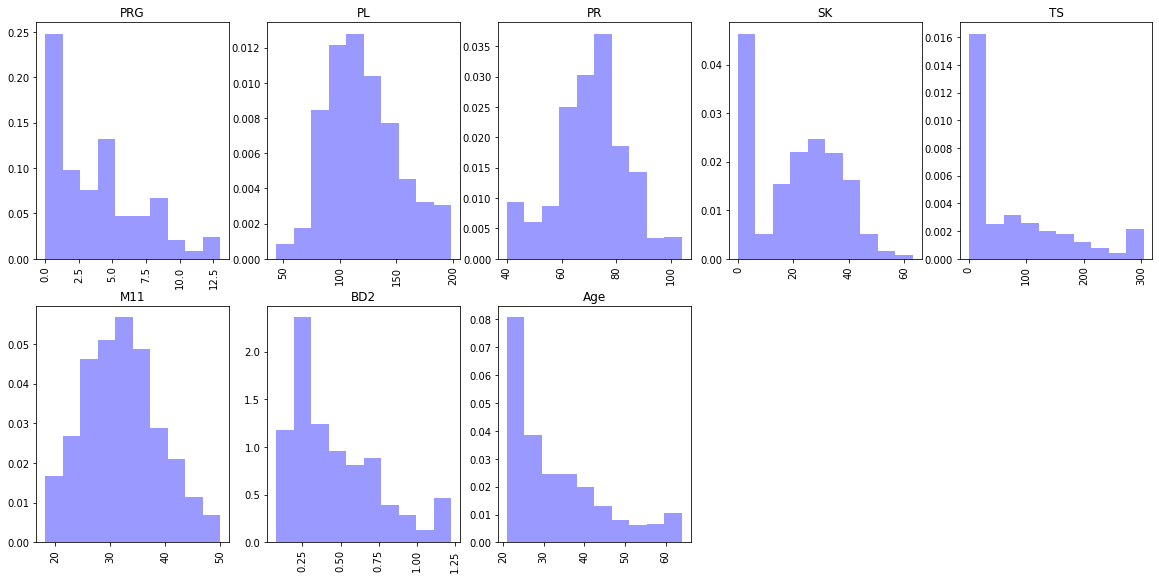

In [17]:
plt.figure(figsize=(20,20))
for i, col in enumerate(data_clean.columns):
    plt.subplot(4,5,i+1)
    plt.hist(data_clean[col], alpha=0.4, color='b', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')

We now have two different training datasets: `patient_train` which is the original and `patient_train_clean` which has no outliers. These will make up our first two models. In this experiment we want to observe whether the cleaned or original training dataset performs better.

Finally, we need to encode the data using binary encoding for the dependent variable, Sepssis as it is a categorical binary variable which has two values: Positive and Negative. This is done on both the clean and original training datasets.

In [18]:
patients_train['Sepssis'] = patients_train['Sepssis'].map({'Positive': 1, 'Negative': 0})
patients_train

,PRG,PL,PR,SK,TS,M11,BD2,Age,Sepssis
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
594,6,123,72,45,230,33.6,0.733,34,0
595,0,188,82,14,185,32.0,0.682,22,1
596,0,67,76,0,0,45.3,0.194,46,0
597,1,89,24,19,25,27.8,0.559,21,0


In [19]:
patients_train_clean['Sepssis'] = patients_train_clean['Sepssis'].map({'Positive': 1, 'Negative': 0})
patients_train_clean

,PRG,PL,PR,SK,TS,M11,BD2,Age,Sepssis
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.224,33.0,1
...,...,...,...,...,...,...,...,...,...
594,6.0,123.0,72.0,45.0,230.0,33.6,0.733,34.0,0
595,0.0,188.0,82.0,14.0,185.0,32.0,0.682,22.0,1
596,0.0,67.0,76.0,0.0,0.0,45.3,0.194,46.0,0
597,1.0,89.0,40.0,19.0,25.0,27.8,0.559,21.0,0


## Model 1: Original Dataset

### Data Split: Hold Out Validation

The data as stated in the specification has already been split into a train and test set. However let's also hold out some data from the train dataset to use for validating our created models and to have the option of hypertuning variables in our model.

First, seperate the dependent variable and the independent variables:

In [20]:
patients_X = patients_train.drop(columns=['Sepssis'])
patients_Y = patients_train['Sepssis']

Now, let's create a validation set for the original train data by holding out 20% of the original training dataset:

In [21]:
from sklearn.model_selection import train_test_split

with pd.option_context('mode.chained_assignment', None):
    patients_train_X, patients_val_X, patients_train_Y, patients_val_Y = train_test_split(patients_X, patients_Y, test_size=0.2, shuffle=True)

### Feature Scaling:

In order to normalize the data, we will use the MinMax feature scaler to have all values of a particular attribute between 0 and 1.

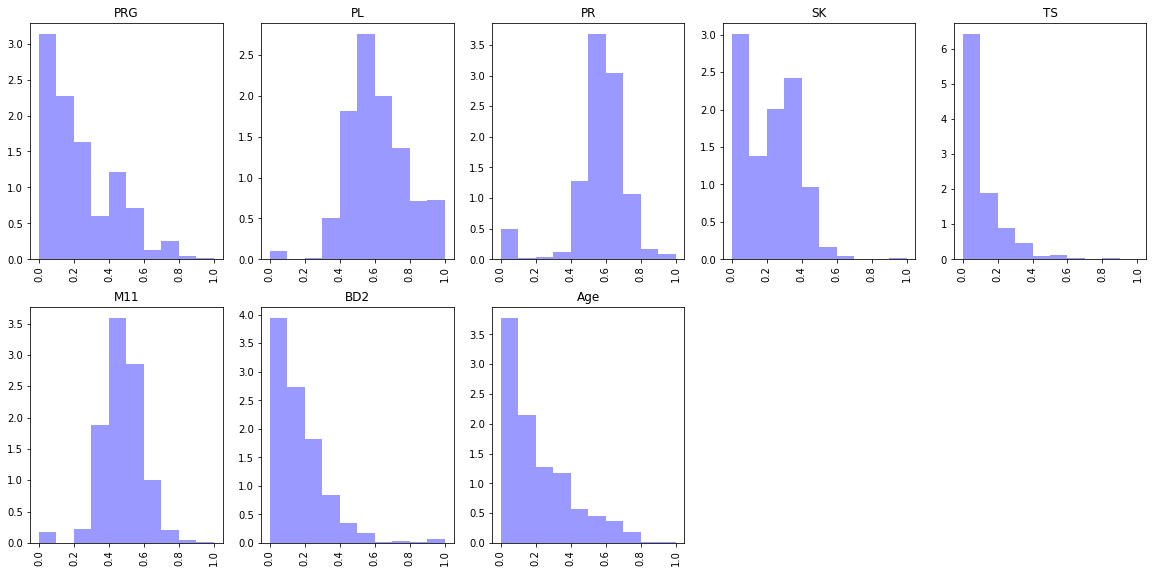

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the training set so the parameters can be learnt
scaler.fit(patients_train_X)

# transform the test, train and val datasets
patients_train_scaled_X = scaler.transform(patients_train_X)
patients_val_scaled_X = scaler.transform(patients_val_X)
patients_test_scaled = scaler.transform(patients_test)

# convert to datasets
patients_train_scaled_X = pd.DataFrame(patients_train_scaled_X, columns=patients_train_X.columns)
patients_val_scaled_X = pd.DataFrame(patients_val_scaled_X, columns=patients_val_X.columns)
patients_test_scaled = pd.DataFrame(patients_test_scaled, columns=patients_test.columns)

plt.figure(figsize=(20,20))
for i, col in enumerate(patients_train_scaled_X.columns):
    plt.subplot(4,5,i+1)
    plt.hist(patients_train_scaled_X[col], alpha=0.4, color='b', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')

Observations:
- The models across the board are more centralised and concise however the difference is not major and the charts which previously had a skew are still skewed.

### Building the Model

Firstly we will train the model with the training data from the original scaled dataset: `patients_train_scaled_X`

In [23]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(patients_train_scaled_X, patients_train_Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Analyse the Model:

Let's now test the models predictions against the validation set.

In [24]:
model.predict(patients_val_scaled_X)

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

We can now score the models accuracy using `.score()` when predicting both the training dataset and the validation set.

In [25]:
train_score = model.score(patients_train_scaled_X, patients_train_Y)

print('The score for the model predicting the training set y values is:', round(train_score, 5))
print('This means that it is able to predict', round(train_score*100, 2), '% of the training set y values correctly')

The score for the model predicting the training set y values is: 0.76618
This means that it is able to predict 76.62 % of the training set y values correctly


In [26]:
val_score = model.score(patients_val_scaled_X, patients_val_Y)

print('The score for the model predicting the validation set y values is:', round(val_score, 5))
print('This means that it is able to predict', round(val_score*100, 2), '% of the validation set y values correctly')

The score for the model predicting the validation set y values is: 0.76667
This means that it is able to predict 76.67 % of the validation set y values correctly


We can also produce a confusion matrix to greater understand the models predictions:

In [27]:
from sklearn.metrics import confusion_matrix

cm_train = confusion_matrix(patients_train_Y, model.predict(patients_train_scaled_X))
TP = cm_train[0][0]
TN = cm_train[1][1]
FP = cm_train[0][1]
FN = cm_train[1][0]

print('In the training set of the original dataset:')
print('There were', TP, 'true positives.')
print('There were', TN, 'true negatives.')
print('There were', FP, 'false positives')
print('There were', FN, 'false negatives')

In the training set of the original dataset:
There were 274 true positives.
There were 93 true negatives.
There were 29 false positives
There were 83 false negatives


In [28]:
cm_val = confusion_matrix(patients_val_Y, model.predict(patients_val_scaled_X))
TP = cm_val[0][0]
TN = cm_val[1][1]
FP = cm_val[0][1]
FN = cm_val[1][0]

print('In the validation set of the original dataset:')
print('There were', TP, 'true positives.')
print('There were', TN, 'true negatives.')
print('There were', FP, 'false positives')
print('There were', FN, 'false negatives')

In the validation set of the original dataset:
There were 80 true positives.
There were 12 true negatives.
There were 8 false positives
There were 20 false negatives


In this experiment, a `True Positive` is when the model predicts a patient to be positive with Sepssis and this is a correct prediction. A `True Negative` is when the model predicts a patient to be negative and this is also a correct prediction. 

A `False Positive` is when the model predicts a patient to be positive with Sepssis but this prediction is incorrect and they do not. Similarly, a `False Negative` is when the model predicts the patient to not have Sepssis and the prediction is incorrectb as they do have it.

## Model 2: Cleaned Dataset

In this model, we will use the cleaned dataset instead of the original. It follows the exact same steps as the first model, simply just using a different set of data which has been more throughly cleaned. We are testing which performs better as the cleaned dataset may have been over processed, and thus the exclusion of outliers may be unjustified and thus decrease the models ability to gauge these data points that do not fall within the majority of the data. 

### Data Split: Hold Out Validation

Let's hold out some data once again to use as the validation set.

In [29]:
patients_X = patients_train_clean.drop(columns=['Sepssis'])
patients_Y = patients_train_clean['Sepssis']

In [30]:
from sklearn.model_selection import train_test_split

with pd.option_context('mode.chained_assignment', None):
    patients_train_clean_X, patients_val_clean_X, patients_train_clean_Y, patients_val_clean_Y = train_test_split(patients_X, patients_Y, test_size=0.2, shuffle=True)

### Feature Scaling:

Perform MinMax Scaling once again to the cleaned dataset.

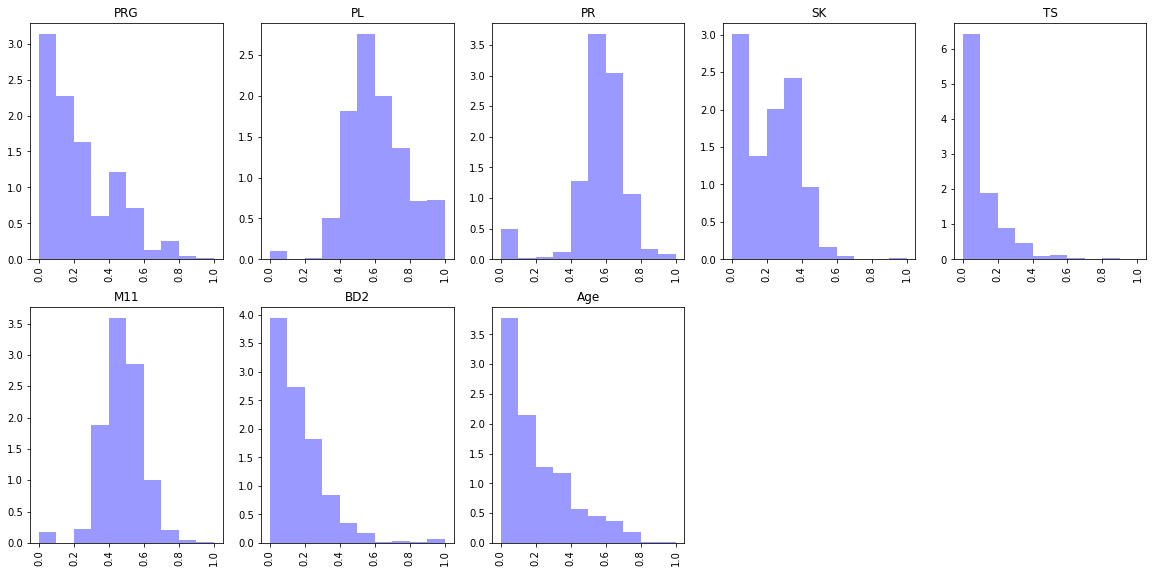

In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the training set so the parameters can be learnt
scaler.fit(patients_train_clean_X)

# transform the test, train and val datasets
patients_train_clean_scaled_X = scaler.transform(patients_train_clean_X)
patients_val_clean_scaled_X = scaler.transform(patients_val_clean_X)
patients_test_scaled = scaler.transform(patients_test)

# convert to datasets
patients_train_clean_scaled_X = pd.DataFrame(patients_train_clean_scaled_X, columns=patients_train_clean_X.columns)
patients_val_clean_scaled_X = pd.DataFrame(patients_val_clean_scaled_X, columns=patients_val_clean_X.columns)
patients_test_scaled = pd.DataFrame(patients_test_scaled, columns=patients_test.columns)

plt.figure(figsize=(20,20))
for i, col in enumerate(patients_train_scaled_X.columns):
    plt.subplot(4,5,i+1)
    plt.hist(patients_train_scaled_X[col], alpha=0.4, color='b', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')

### Building the Model: 

In [32]:
from sklearn.linear_model import LogisticRegression

# Train the model using training data
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(patients_train_clean_scaled_X, patients_train_clean_Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Analyse the Model:

In [33]:
model.predict(patients_val_clean_scaled_X)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [34]:
train_score_clean = model.score(patients_train_clean_scaled_X, patients_train_clean_Y)

print('The score for the model predicting the training set y values is:', round(train_score_clean, 5))
print('This means that it is able to predict', round(train_score_clean*100, 2), '% of the training set y values correctly')

The score for the model predicting the training set y values is: 0.79123
This means that it is able to predict 79.12 % of the training set y values correctly


In [35]:
val_score_clean = model.score(patients_val_clean_scaled_X, patients_val_clean_Y)

print('The score for the model predicting the validation set y values is:', round(val_score_clean, 5))
print('This means that it is able to predict', round(val_score_clean*100, 2), '% of the validation set y values correctly')

The score for the model predicting the validation set y values is: 0.7
This means that it is able to predict 70.0 % of the validation set y values correctly


In [36]:
from sklearn.metrics import confusion_matrix

cm_train_clean = confusion_matrix(patients_train_clean_Y, model.predict(patients_train_clean_scaled_X))
TP = cm_train_clean[0][0]
TN = cm_train_clean[1][1]
FP = cm_train_clean[0][1]
FN = cm_train_clean[1][0]

print('In the training set of the cleaned dataset:')
print('There were', TP, 'true positives.')
print('There were', TN, 'true negatives.')
print('There were', FP, 'false positives')
print('There were', FN, 'false negatives')

In the training set of the cleaned dataset:
There were 285 true positives.
There were 94 true negatives.
There were 30 false positives
There were 70 false negatives


In [37]:
cm_val_clean = confusion_matrix(patients_val_clean_Y, model.predict(patients_val_clean_scaled_X))
TP = cm_val_clean[0][0]
TN = cm_val_clean[1][1]
FP = cm_val_clean[0][1]
FN = cm_val_clean[1][0]

print('In the validation set of the cleaned dataset:')
print('There were', TP, 'true positives.')
print('There were', TN, 'true negatives.')
print('There were', FP, 'false positives')
print('There were', FN, 'false negatives')

In the validation set of the cleaned dataset:
There were 65 true positives.
There were 19 true negatives.
There were 11 false positives
There were 25 false negatives


## Comparing Model 1 and Model 2 using K-Fold Cross Validation

Simply using the holdout data for validation was not enough to accurately compare the two models to see which was better. This is because it was dependent on the split of the dataset, which was different each time the code was rerun (the train and validation sets were generated differently). Sometimes the cleaned dataset performed better and sometimes the original dataset performed better. 

Let's build upon this and use K-Fold Cross Validation to build multiple validation sets, and get the average performance score of these for each model so we can determine which is better on average.

First, let's set the number of splits to 5, meaning we will create and test against 5 validation sets (this is the max as the split is 80% train 20% validation).

In [38]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=5)

Calculate the train scores for the original dataset:

In [39]:
from sklearn.model_selection import cross_val_score

cross_val_score(LogisticRegression(solver='lbfgs', max_iter=1000), patients_train_scaled_X, patients_train_Y)

array([0.77083333, 0.69791667, 0.75      , 0.77083333, 0.82105263])

Calculate the validation scores for the original dataset:

In [40]:
cross_val_score(LogisticRegression(solver='lbfgs', max_iter=1000), patients_val_scaled_X, patients_val_Y)

array([0.70833333, 0.70833333, 0.75      , 0.75      , 0.75      ])

Calculate the train scores for the cleaned dataset:

In [41]:
cross_val_score(LogisticRegression(solver='lbfgs', max_iter=1000), patients_train_clean_scaled_X, patients_train_clean_Y)

array([0.78125   , 0.78125   , 0.72916667, 0.82291667, 0.82105263])

Calculate the validation scores for the cleaned dataset:

In [42]:
cross_val_score(LogisticRegression(solver='lbfgs', max_iter=1000), patients_val_clean_scaled_X, patients_val_clean_Y)

array([0.625     , 0.79166667, 0.70833333, 0.70833333, 0.75      ])

Calcualate the average scores for the training and validation sets for both the original dataset and the cleaned dataset:

In [43]:
orig_train = cross_val_score(LogisticRegression(solver='lbfgs', max_iter=1000), patients_train_scaled_X, patients_train_Y)
orig_val = cross_val_score(LogisticRegression(solver='lbfgs', max_iter=1000), patients_val_scaled_X, patients_val_Y)

cleaned_train = cross_val_score(LogisticRegression(solver='lbfgs', max_iter=1000), 
                                patients_train_clean_scaled_X, patients_train_clean_Y)
cleaned_val = cross_val_score(LogisticRegression(solver='lbfgs', max_iter=1000), patients_val_clean_scaled_X, patients_val_clean_Y)

avg_train_original = sum(orig_train)/len(orig_train)
avg_train_cleaned = sum(cleaned_train)/len(cleaned_train)
avg_val_original = sum(orig_val)/len(orig_val)
avg_val_cleaned = sum(cleaned_val)/len(cleaned_val)

print('The average train score for the original dataset is:', round(avg_train_original, 4))
print('The average validation score for the original dataset is:', round(avg_val_original, 4))

print('The average train score for the cleaned dataset is:', round(avg_train_cleaned, 4))
print('The average validation score for the cleaned dataset is:', round(avg_val_cleaned, 4))

The average train score for the original dataset is: 0.7621
The average validation score for the original dataset is: 0.7333
The average train score for the cleaned dataset is: 0.7871
The average validation score for the cleaned dataset is: 0.7167


**Observations:**
It seems as if both datasets perform very similarly in both predicting the training dataset and the validation datasets. Their scores are similar in both. We can therefore conclude that the removal of outliers does not increase performance.

As such, we can make the assumption that the values initally thought of as outliers may not actually be outliers but rather meaningful values. Thus, we can say Model 1 is superior as it is likely it is able to predict for a greater range of unseen data.

## Model 3: Hyperparameter Tuning on Model 1

In [44]:
patients_X = patients_train_scaled_X
patients_Y = patients_train_Y

In [45]:
param_grid = [
    {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
     'C': np.logspace(-4,4,20),
     'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
     'max_iter': [500, 1000, 2500, 5000]
    }
]

In [46]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()

clf = GridSearchCV(model, param_grid = param_grid, cv = 5, verbose = True, n_jobs=-1)

optimal_clf = clf.fit(patients_X, patients_Y)

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 600 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 2600 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 5400 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 8000 out of 8000 | elapsed:   22.0s finished


In [47]:
optimal_clf.best_estimator_

LogisticRegression(C=11.288378916846883, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=500, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
clf_df = pd.DataFrame(clf.cv_results_)
clf_df[['param_C', 'param_penalty', 'param_solver', 'param_max_iter']]

,param_C,param_penalty,param_solver,param_max_iter
0,0.0001,l1,lbfgs,500
1,0.0001,l1,newton-cg,500
2,0.0001,l1,liblinear,500
3,0.0001,l1,sag,500
4,0.0001,l1,saga,500
...,...,...,...,...
1595,10000,none,lbfgs,5000
1596,10000,none,newton-cg,5000
1597,10000,none,liblinear,5000
1598,10000,none,sag,5000


In [49]:
clf.best_score_

0.770438596491228

In [50]:
clf.best_params_

{'C': 11.288378916846883,
 'max_iter': 500,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [103]:
clf.score(patients_train_scaled_X, patients_train_Y)

0.7766179540709812

In [102]:
clf.score(patients_val_scaled_X, patients_val_Y)

0.775

## Model 4: Random Forest

Let's now implement a random forest model to see whether this performs better than the logistic regression models we previously implemented. This model does not require feature scaling, so we can skip straight to building the model. 

For the random forest model we will use the uncleaned original dataset. Firstly, define the dependent variable as X and the independent variables as Y:

In [51]:
patients_X = patients_train.drop(columns=['Sepssis'])
patients_Y = patients_train['Sepssis']

Next split the data into the training and validation sets:

In [54]:
X_train, X_val, Y_train, Y_val = train_test_split(patients_X, patients_Y, test_size=0.2, random_state=101)
print('X_train:', X_train.shape)
print('Y_train:', Y_train.shape)
print('X_val:', X_val.shape)
print('Y_val:', Y_val.shape)

X_train: (479, 8)
Y_train: (479,)
X_val: (120, 8)
Y_val: (120,)


Build a simple random forest model to have a point of comparison.

In [57]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Show the predicted Y values of the training dataset.

In [59]:
model.predict(X_train)

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,

In [62]:
rf_train_score = model.score(X_train, Y_train)
print('The score for the model predicting the training set y values is:', round(rf_train_score, 5))
print('This means that it is able to predict', round(rf_train_score*100, 2), '% of the training set y values correctly')

The score for the model predicting the training set y values is: 1.0
This means that it is able to predict 100.0 % of the training set y values correctly


In [63]:
rf_val_score = model.score(X_val, Y_val)
print('The score for the model predicting the training set y values is:', round(rf_val_score, 5))
print('This means that it is able to predict', round(rf_val_score*100, 2), '% of the training set y values correctly')

The score for the model predicting the training set y values is: 0.76667
This means that it is able to predict 76.67 % of the training set y values correctly


Now define the hyperparameters we want to tune for:

In [93]:
n_estimators = [int(x) for x in np.linspace(start=10, stop = 200, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [2,4]
min_samples_split = [2,4,6]
min_samples_leaf = [1,3,5]
bootstrap = [True, False]

param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap }
print(param_grid)

{'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 4, 6], 'min_samples_leaf': [1, 3, 5], 'bootstrap': [True, False]}


Run GridSearch to tune model and find optimal parameters:

In [94]:
rf_Grid = GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_grid, cv=3, verbose=2, n_jobs=4)
rf_Grid.fit(X_train, Y_train)

Fitting 3 folds for each of 720 candidates, totalling 2160 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  57 tasks      | elapsed:    8.0s
[Parallel(n_jobs=4)]: Done 178 tasks      | elapsed:   23.8s
[Parallel(n_jobs=4)]: Done 381 tasks      | elapsed:   49.3s
[Parallel(n_jobs=4)]: Done 664 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 1029 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done 1474 tasks      | elapsed:  3.0min
[Parallel(n_jobs=4)]: Done 2001 tasks      | elapsed:  3.8min
[Parallel(n_jobs=4)]: Done 2160 out of 2160 | elapsed:  4.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

Show the best parameters that the GridSearch found:

In [95]:
rf_Grid.best_params_

{'bootstrap': False,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 52}

Predict training y values with optimised random forest model:

In [104]:
rf_optimised_score = rf_Grid.score(X_train,Y_train)
print('The score for the model predicting the training set y values is:', round(rf_optimised_score, 5))
print('This means that it is able to predict', round(rf_optimised_score*100, 2), '% of the training set y values correctly')

The score for the model predicting the training set y values is: 0.84969
This means that it is able to predict 84.97 % of the training set y values correctly


Predict validation y values with optimised random forest model:

In [105]:
rf_optimisedval_score = rf_Grid.score(X_val,Y_val)
print('The score for the model predicting the training set y values is:', round(rf_optimisedval_score, 5))
print('This means that it is able to predict', round(rf_optimisedval_score*100, 2), '% of the training set y values correctly')

The score for the model predicting the training set y values is: 0.73333
This means that it is able to predict 73.33 % of the training set y values correctly


In [98]:
rf_Grid.best_score_

0.791208071278826

Now the score for the training set is not 1, which means it is not overfitted to the training data anymore. However, it is still not as good as Model 3, the optimised Logistic Regression Model.

## Predicting Test Set using Model 3 - The Optimised Logistic Regression Model

View Test dataset we will be predicting the y values of using Model 3.

In [109]:
patients_test_scaled

,PRG,PL,PR,SK,TS,M11,BD2,Age
0,0.076923,0.422078,-0.03125,0.285714,0.394737,0.154088,0.287086,0.116279
1,0.076923,0.415584,0.75000,0.301587,0.000000,0.279874,0.280977,0.069767
2,0.461538,0.337662,-0.62500,0.000000,0.000000,0.172956,0.097731,0.162791
3,0.076923,0.519481,0.53125,0.571429,0.000000,0.301887,0.019197,0.209302
4,0.538462,0.688312,0.59375,0.460317,0.414474,0.534591,0.535777,0.767442
...,...,...,...,...,...,...,...,...
164,0.769231,0.370130,0.56250,0.761905,0.592105,0.462264,0.081152,0.976744
165,0.153846,0.506494,0.46875,0.428571,0.000000,0.584906,0.228621,0.139535
166,0.384615,0.500000,0.50000,0.365079,0.368421,0.251572,0.145724,0.209302
167,0.076923,0.532468,0.31250,0.000000,0.000000,0.374214,0.236475,0.604651


Make the predictions:

In [110]:
clf.predict(patients_test_scaled)

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

Add the above predictions to the test dataframe.

In [113]:
predictions_sepssis = clf.predict(patients_test_scaled)
predictions = patients_test.copy()
predictions['Sepssis'] = predictions_sepssis
predictions['Sepssis'] = predictions['Sepssis'].map({1 : 'Positive', 0 : 'Negative'})
predictions

,PRG,PL,PR,SK,TS,M11,BD2,Age,Sepssis
0,1,109,38,18,120,23.1,0.407,26,Negative
1,1,108,88,19,0,27.1,0.400,24,Negative
2,6,96,0,0,0,23.7,0.190,28,Negative
3,1,124,74,36,0,27.8,0.100,30,Negative
4,7,150,78,29,126,35.2,0.692,54,Positive
...,...,...,...,...,...,...,...,...,...
164,10,101,76,48,180,32.9,0.171,63,Negative
165,2,122,70,27,0,36.8,0.340,27,Negative
166,5,121,72,23,112,26.2,0.245,30,Negative
167,1,126,60,0,0,30.1,0.349,47,Negative


Export the completed dataframe to a csv file.

In [114]:
predictions.to_csv('s3843078_predictions.csv')